## Imports

In [24]:
import matplotlib.pylab as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Import Data and Inspect

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
# Assign data and labels
X, y = mnist.data, mnist.target

The label for this image is: 7


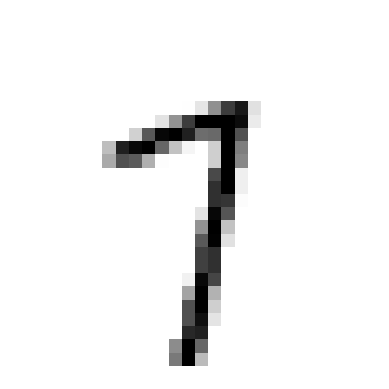

In [6]:
# Create plot function
def plot_single_digit(img_index):
    img_data = X[img_index]
    img = img_data.reshape(28, 28)
    plt.imshow(img, cmap='binary')
    plt.axis('off')
    img_label = y[img_index]
    print(f'The label for this image is: {img_label}')

# Select random digit from dataset
digit_index = 42
# Pass random digit to plot function
plot_single_digit(digit_index)

### Create Train/Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN
Start with a simple K-Nearest Neighbors classifier as our baseline.

In [11]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9700714285714286

The baseline score is good, but let's see if it can be improved by tuning our hyperparameters. We will only use the first 10,000 images to improve performance of the grid search.

In [17]:
param_grid = [
    {'n_neighbors': [4, 6, 8],
    'weights': ['uniform', 'distance'],
    }]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [4, 6, 8],
                          'weights': ['uniform', 'distance']}])

In [18]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

As n_neighbors is the minimum value from our parameters grid, we'll do the grid search again with a lower range for this hyperparamter.

In [20]:
param_grid_2 = [
    {'n_neighbors': [1, 2, 3, 4],
    'weights': ['uniform', 'distance'],
    }]

grid_search = GridSearchCV(knn_clf, param_grid_2, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4],
                          'weights': ['uniform', 'distance']}])

In [21]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

n_neighbors has remained as 4 despite offering lower values in the parameter grid, so we will use this value.

In [22]:
grid_search.best_score_

0.9483

We can see the score has dropped, but this is to be expected since is was only trained on the first 10,000 images. We will now use the best model and train it again on the full dataset.

In [23]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_score = grid_search.score(X_test, y_test)
tuned_score

0.9731428571428572

We can see the score has improved slightly, from 97.0% to 97.3%.